<a href="https://colab.research.google.com/github/onuroner/TutorialsAboutML/blob/main/Image_Classification_Tutorial_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Verisetinin Kaggle Üzerinden Yüklenmesi

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d alxmamaev/flowers-recognition

100% 225M/225M [00:10<00:00, 21.6MB/s]
100% 225M/225M [00:10<00:00, 22.0MB/s]


In [ ]:
! unzip flowers-recognition.zip

# Kütüphanelerin Import Edilmesi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
dataset_dir = "/content/flowers"

# Veriyi İnceleme

In [ ]:
for i in os.listdir(dataset_dir):
  print(i)

tulip
daisy
sunflower
dandelion
rose


In [ ]:
sunflower_dir = dataset_dir+"/sunflower"
tulip_dir = dataset_dir+"/tulip"
daisy_dir = dataset_dir+"/daisy"
dandelion_dir = dataset_dir+"/dandelion"
rose_dir = dataset_dir+"/rose"

In [ ]:
total_img = 0

for i in os.listdir(dataset_dir):
  size = len(os.listdir(dataset_dir+"/"+i))
  total_img += size
  print(f"Number of the {i} images: {size}")

print(f"\n Total images: {total_img}")

Number of the tulip images: 984
Number of the daisy images: 764
Number of the sunflower images: 733
Number of the dandelion images: 1052
Number of the rose images: 784

 Total images: 4317


# Yeni Dizin Oluşturulması

## Train-Test Dizinleri

In [ ]:
train_dir = "/content/data/train"
val_dir = "/content/data/val"

os.makedirs(train_dir)
os.makedirs(val_dir)

## Train Setindeki Sınıflar

In [ ]:
train_sunflower = train_dir+"/sunflower"
train_tulip = train_dir+"/tulip"
train_daisy = train_dir+"/daisy"
train_dandelion = train_dir+"/dandelion"
train_rose = train_dir+"/rose"

In [ ]:
os.makedirs(train_sunflower)
os.makedirs(train_tulip)
os.makedirs(train_daisy)
os.makedirs(train_dandelion)
os.makedirs(train_rose)

## Validation Setindeki Sınıflar

In [ ]:
val_sunflower = val_dir+"/sunflower"
val_tulip = val_dir+"/tulip"
val_daisy = val_dir+"/daisy"
val_dandelion = val_dir+"/dandelion"
val_rose = val_dir+"/rose"

In [ ]:
os.makedirs(val_sunflower)
os.makedirs(val_tulip)
os.makedirs(val_daisy)
os.makedirs(val_dandelion)
os.makedirs(val_rose)

# Dosyaların Kopyalanması

In [ ]:
import shutil

Train-val dağılımları nasıl olacak öğrenelim.

In [ ]:
for i in os.listdir(dataset_dir):
  size = len(os.listdir(dataset_dir+"/"+i))
  total_img += size
  train_size = int(size*0.7)
  val_size = size-train_size
  print(f"Number of the {i} images: {size}, train: {train_size}, val: {val_size}")

Number of the tulip images: 984, train: 688, val: 296
Number of the daisy images: 764, train: 534, val: 230
Number of the sunflower images: 733, train: 513, val: 220
Number of the dandelion images: 1052, train: 736, val: 316
Number of the rose images: 784, train: 548, val: 236


Her sınıfın train setinde kaç tane resim olacağını tanımlıyoruz.

In [ ]:
sunflower_train = 513
tulip_train = 688
daisy_train = 534
dandelion_train = 736
rose_train = 548

Kaynak dizinleri bir liste yapısında tutalım.

In [ ]:
src_list=[]

for i in os.listdir(dataset_dir):
  src_list.append(dataset_dir + "/" + i)

In [ ]:
src_list

['/content/flowers/tulip',
 '/content/flowers/daisy',
 '/content/flowers/sunflower',
 '/content/flowers/dandelion',
 '/content/flowers/rose']

Resimleri sınıf sınıf taşıyalım.

In [ ]:
source_dir = os.listdir(src_list[0])

for i in range(len(source_dir)):
  source = src_list[0] + "/" + source_dir[i]
  print(source)

  if(i<tulip_train):
    destination = "/content/data/train/tulip/"
  else:
    destination = "/content/data/val/tulip/"
    
  shutil.move(source, destination)

In [ ]:
source_dir = os.listdir(src_list[1])

for i in range(len(source_dir)):
  source = src_list[1] + "/" + source_dir[i]
  print(source)

  if(i<daisy_train):
    destination = "/content/data/train/daisy/"
  else:
    destination = "/content/data/val/daisy/"
    
  shutil.move(source, destination)

In [ ]:
source_dir = os.listdir(src_list[2])

for i in range(len(source_dir)):
  source = src_list[2] + "/" + source_dir[i]
  print(source)

  if(i<sunflower_train):
    destination = "/content/data/train/sunflower/"
  else:
    destination = "/content/data/val/sunflower/"
    
  shutil.move(source, destination)

In [ ]:
source_dir = os.listdir(src_list[3])

for i in range(len(source_dir)):
  source = src_list[3] + "/" + source_dir[i]
  print(source)

  if(i<dandelion_train):
    destination = "/content/data/train/dandelion/"
  else:
    destination = "/content/data/val/dandelion/"
    
  shutil.move(source, destination)

In [ ]:
source_dir = os.listdir(src_list[4])

for i in range(len(source_dir)):
  source = src_list[4] + "/" + source_dir[i]
  print(source)

  if(i<rose_train):
    destination = "/content/data/train/rose/"
  else:
    destination = "/content/data/val/rose/"
    
  shutil.move(source, destination)

Sayıları kontrol edelim.

In [ ]:
print(len(os.listdir('/content/data/train/dandelion')))
print(len(os.listdir('/content/data/val/dandelion')))

736
316


In [ ]:
print(len(os.listdir('/content/data/train/daisy')))
print(len(os.listdir('/content/data/val/daisy')))

534
230


In [ ]:
print(len(os.listdir('/content/data/train/rose')))
print(len(os.listdir('/content/data/val/rose')))

548
236


In [ ]:
print(len(os.listdir('/content/data/train/sunflower')))
print(len(os.listdir('/content/data/val/sunflower')))

513
220


In [ ]:
print(len(os.listdir('/content/data/train/tulip')))
print(len(os.listdir('/content/data/val/tulip')))

688
296


# Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/data/train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=64,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 3019 images belonging to 5 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
        '/content/data/val',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 200x200
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 1298 images belonging to 5 classes.


# Modelin Oluşturulması

In [ ]:
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.applications import VGG19

In [ ]:
pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
pre_trained_model.layers

In [ ]:
for layer in pre_trained_model.layers[:19]:
    layer.trainable = False
model = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(5 , activation='softmax')])

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 5)                 23045     
                                                                 
Total params: 20,047,429
Trainable params: 4,742,661
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
history = model.fit(x=train_generator, 
                    epochs=15,  
                    validation_data = validation_generator)

Epoch 1/15
48/48 [==============================] - 64s 1s/step - loss: 0.9918 - accuracy: 0.6194 - val_loss: 0.6299 - val_accuracy: 0.7658
Epoch 2/15
48/48 [==============================] - 48s 988ms/step - loss: 0.6074 - accuracy: 0.7655 - val_loss: 0.4989 - val_accuracy: 0.8120
Epoch 3/15
48/48 [==============================] - 47s 981ms/step - loss: 0.5269 - accuracy: 0.8095 - val_loss: 0.4856 - val_accuracy: 0.8228
Epoch 4/15
48/48 [==============================] - 47s 983ms/step - loss: 0.4369 - accuracy: 0.8437 - val_loss: 0.4344 - val_accuracy: 0.8398
Epoch 5/15
48/48 [==============================] - 55s 1s/step - loss: 0.4122 - accuracy: 0.8463 - val_loss: 0.3865 - val_accuracy: 0.8582
Epoch 6/15
48/48 [==============================] - 47s 986ms/step - loss: 0.3877 - accuracy: 0.8642 - val_loss: 0.3931 - val_accuracy: 0.8505
Epoch 7/15
48/48 [==============================] - 49s 1s/step - loss: 0.3460 - accuracy: 0.8711 - val_loss: 0.4061 - val_accuracy: 0.8575
Epoch 8/

# Model Metriklerinin Gözlemlenmesi

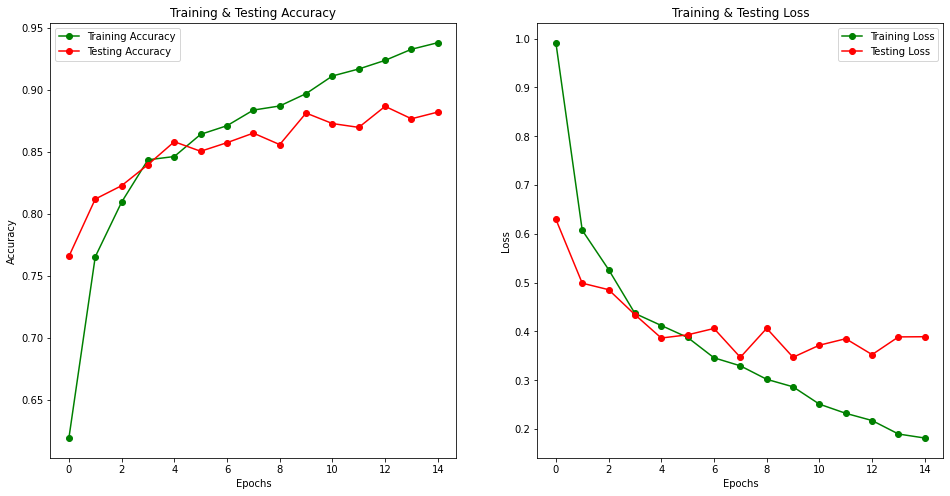

In [ ]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,8)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

# Tahmin Yapılması

In [ ]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg19 import preprocess_input

In [ ]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
#load the image
my_image = load_img('/content/sunflower2.jpeg', target_size=(224, 224))

In [ ]:
my_image = img_to_array(my_image)

In [ ]:
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))

In [ ]:
my_image = preprocess_input(my_image)

In [ ]:
prediction = model.predict(my_image)
prediction

1/1 [==============================] - 0s 17ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)